In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\thorr\AppData\Local\Temp\ipykernel_11384\3391910190.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
import numpy as np
import os
import pickle as p
import networkx as nx
import graph_matching.utils.graph.graph_visu as gv
import graph_matching.utils.graph.graph_processing as gp
import matplotlib.pyplot as plt
import random
import plotly.express as px
import plotly.figure_factory as ff
import trimesh
import resources.slam.topology as stop
from graph_matching.utils.graph.sphere import *

In [4]:
#generate random color codes for plotting
def generate_random_color_codes(num_colors):
    
    number_of_colors = num_colors
    
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
    
    return color

In [47]:
def remove_dummy_nodes(graph):
    G = graph.copy()
    to_remove = []
    for (p, d) in G.nodes(data=True):
        #if d['is_dummy'] == True:
        to_remove.append(p)
    G.remove_nodes_from(to_remove)
    return G

In [48]:
simu_path = "C:/Users/thorr/PycharmProjects/GraphMatching/graph_matching/demos/graph_generated/pickle/noise_100_outliers_varied/"

In [49]:
folder_name = os.listdir(simu_path)

In [50]:
folder_name

['graph_00000.gpickle',
 'graph_00001.gpickle',
 'graph_00002.gpickle',
 'graph_00003.gpickle']

In [51]:
path_1 = "C:/Users/thorr/PycharmProjects/GraphMatching/graph_matching/demos/graph_generated/pickle/noise_100_outliers_varied/"
real_path = "C:/Users/thorr/PycharmProjects/GraphMatching/graph_matching/data/Oasis_original_new/"

# degree distribution simulated graph

In [52]:
# Degree for simulated graph
degree_list = []
for graph in os.listdir(path_1):
    G = p.load(open(path_1 + graph, "rb" )) #read the graphs
    #new_G = remove_dummy_nodes(G)
    #new_G.remove_edges_from(nx.selfloop_edges(new_G)) # remove self loops
    degree_list.append(list(dict(nx.degree(G)).values()))

In [53]:
avg_degree = []
avg_std = []
for degrees in degree_list:
    avg_degree.append(np.mean(degrees))
    avg_std.append(np.std(degrees))

In [54]:
def errorfill(x, y, yerr, color=None, alpha_fill=0.2, ax=None,label = None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = next(ax._get_lines.prop_cycler)['color']
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color,label= label)
    ax.legend(loc='upper right')
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)

In [55]:
# Degree for Real graph
degree_list_real = []
for graph in os.listdir(real_path):
    G = p.load(open(real_path + graph, "rb" )) #read the graphs
    new_G = remove_dummy_nodes(G)
    new_G.remove_edges_from(nx.selfloop_edges(new_G)) # remove self loops
    degree_list_real.append(list(dict(nx.degree(new_G)).values()))

In [56]:
avg_degree_real = []
avg_std_real = []
for degrees in degree_list_real:
    avg_degree_real.append(np.mean(degrees))
    avg_std_real.append(np.std(degrees))

C:\Users\thorr\PycharmProjects\GraphMatching\venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\thorr\PycharmProjects\GraphMatching\venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\thorr\PycharmProjects\GraphMatching\venv\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\thorr\PycharmProjects\GraphMatching\venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\thorr\PycharmProjects\GraphMatching\venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

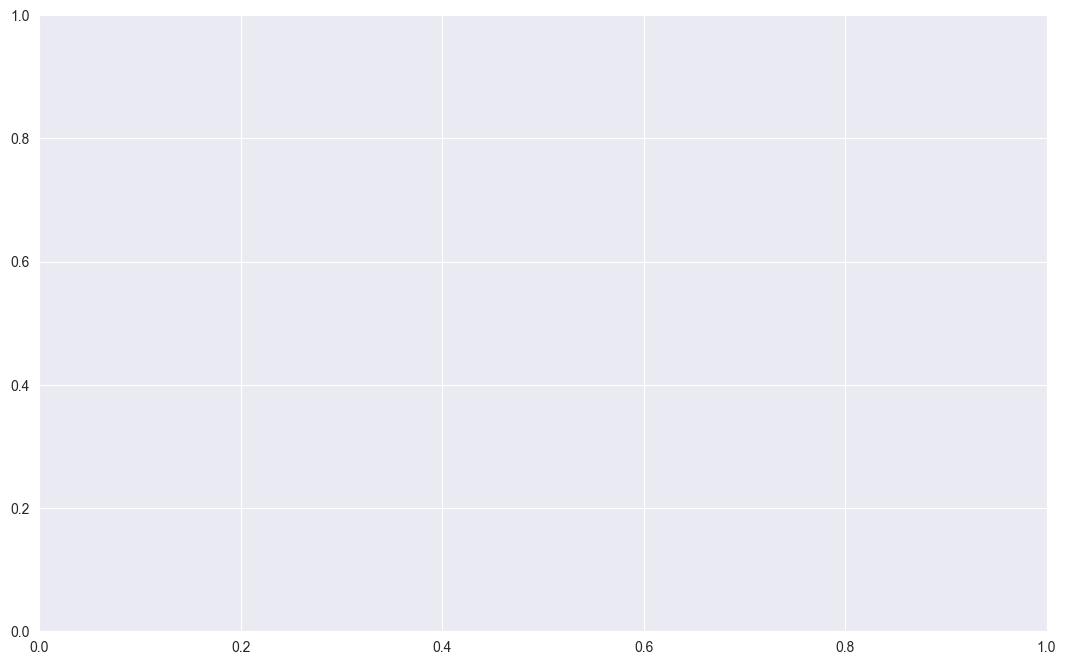

In [57]:
plt.figure(figsize=(13,8))

errorfill(np.arange(0,len(avg_degree)),np.array(avg_degree), np.array(avg_std),label="simu")
errorfill(np.arange(0,len(avg_degree_real)),np.array(avg_degree_real), np.array(avg_std_real),label='real')

plt.title("Degree, simulated Graphs Noise 1000,Outliers 16")
plt.xlabel('# graphs')
plt.ylabel('Degree')
plt.show()

In [ ]:
color = generate_random_color_codes(len(degree_list)+len(degree_list_real))

real_graph_names = ["R_"+names for names in os.listdir(real_path)]


fig = ff.create_distplot(degree_list + degree_list_real, os.listdir(path_1)+real_graph_names, show_hist=False, colors=color)
#fig = ff.create_distplot([avg_degree_list, avg_degree_list_real], ["avg_degree_simu","avg_degree_real"], show_hist=False, colors=color)

# Add title
fig.update_layout(title_text='Degree density simu 1000 noise 0 outliers and Real data')
fig.show()

# average neighbour degree distribution

In [17]:
def degree_of_neighb(G):
    nb_degree_dict = {}
    for node in G:
        nb_degree = []
        for nb in G.neighbors(node):
            nb_degree.append(G.degree(nb))
        nb_degree_dict[node] = nb_degree
    return nb_degree_dict

In [18]:
all_graph_nb_degree = []
for graph in os.listdir(path_1):
    graph = nx.read_gpickle(path_1+graph)
    #graph = remove_dummy_nodes(graph)
    #graph.remove_edges_from(nx.selfloop_edges(graph)) # remove self loops
    all_graph_nb_degree.append(degree_of_neighb(graph))

AttributeError: module 'networkx' has no attribute 'read_gpickle'

In [19]:
avg_nb_degree_all_graph = []
for degree_dict in all_graph_nb_degree:
    avg_degree = [np.mean(lst) for lst in list(degree_dict.values())]
    avg_nb_degree_all_graph.append(avg_degree)

In [20]:
color = generate_random_color_codes(len(avg_nb_degree_all_graph))
fig = ff.create_distplot(avg_nb_degree_all_graph, os.listdir(path_1), show_hist=False,bin_size=.2, colors=color)

# Add title
fig.update_layout(title_text='Average neigbour degree for simu graphs 900 noise 0 outliers')
fig.show()

IndexError: list index out of range

# Average Neighbour Geo distance

In [21]:
# neighbours geo distance

def geo_dist_of_neighb(G):
    nb_dist_dict = {}
    for node in G:
        nb_geo_dist = []
        for nb in G.neighbors(node):
            nb_geo_dist.append(G.get_edge_data(node,nb)['geodesic_distance'])
        nb_dist_dict[node] = nb_geo_dist
    return nb_dist_dict

In [59]:
import pickle
all_graph_nb_distance = []
for graph in os.listdir(path_1):
    with open(path_1+graph, encoding="utf-8") as f:
        graph = pickle.load(f)
    #graph = nx.read_gpickle(path_1+graph)
    #graph = remove_dummy_nodes(graph)
    #graph.remove_edges_from(nx.selfloop_edges(graph)) # remove self loops
    all_graph_nb_distance.append(geo_dist_of_neighb(graph))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [23]:
avg_nb_dist_all_graph = []
for dist_dict in all_graph_nb_distance:
    avg_dist = [np.mean(lst) for lst in list(dist_dict.values())]
    avg_nb_dist_all_graph.append(avg_dist)

In [24]:
color = generate_random_color_codes(len(avg_nb_dist_all_graph))
fig = ff.create_distplot(avg_nb_dist_all_graph, os.listdir(path_1), show_hist=False,bin_size=.2, colors=color)

# Add title
fig.update_layout(title_text='Average neigbour geo distance for simu graphs 900 noise 0 outliers')
fig.show()

IndexError: list index out of range

## Average geo distance Real and Simu

In [25]:
real_path = "/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/OASIS_full_batch/modified_graphs/"
path_1 = "/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/0/noise_1000,outliers_0/graphs/"
simu_path = "/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/0/"

In [26]:
def mean_edge_len(G):
    
    all_geo = [z['geodesic_distance'] for x,y,z in list(G.edges.data())]
    mean_geo = np.array(all_geo).mean()
    std = np.std(all_geo)
    
    return mean_geo,std

In [27]:
simu_graph_geo_distance = []
simu_graph_std = []
for folder in folder_name:
    if os.path.isdir(simu_path+folder):
        print(folder)
    
        mean_graph_geo_distance = []
        mean_graph_std = []
        
        graph_path = simu_path+folder+'/'+'graphs/'
        
        for graph in os.listdir(graph_path):
            graph = nx.read_gpickle(graph_path+graph)
            #graph = remove_dummy_nodes(graph)
            #graph.remove_edges_from(nx.selfloop_edges(graph)) # remove self loops
            
            mean_geo,mean_std = mean_edge_len(graph)
            
            mean_graph_geo_distance.append(mean_geo)
            mean_graph_std.append(mean_std)
        
        simu_graph_geo_distance.append(mean_graph_geo_distance)
        simu_graph_std.append(mean_graph_std)

NameError: name 'folder_name' is not defined

In [28]:
real_graph_geo_distance = []
real_graph_std = []
for graph in os.listdir(real_path):
    graph = nx.read_gpickle(real_path+graph)
    graph = remove_dummy_nodes(graph)
    graph.remove_edges_from(nx.selfloop_edges(graph)) # remove self loops
    
    mean_geo,mean_std = mean_edge_len(graph)
    
    real_graph_geo_distance.append(mean_geo)
    real_graph_std.append(mean_std)

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/OASIS_full_batch/modified_graphs/'

In [ ]:
plt.figure(figsize=(13,8))

errorfill(np.arange(0,len(simu_graph_geo_distance[4])),np.array(simu_graph_geo_distance[4]), np.array(simu_graph_std[4]),label="simu")
errorfill(np.arange(0,len(real_graph_geo_distance)),np.array(real_graph_geo_distance), np.array(real_graph_std),label='real')

plt.title("Geodesic distance, simulated Graphs Noise 1000,Outliers 0")
plt.xlabel('# graphs')
plt.ylabel('Geodesic distance')
plt.show()

In [ ]:
#color = generate_random_color_codes(len(real_graph_geo_distance)+len(simu_graph_geo_distance))
simu_graph_names = [name for name in os.listdir(simu_path) if os.path.isdir(simu_path+name)]

color = generate_random_color_codes(len(simu_graph_names)+1)

#real_graph_names = ["R_"+names for names in os.listdir(real_path)]

fig = ff.create_distplot([real_graph_geo_distance]+simu_graph_geo_distance,["real_graph"] + simu_graph_names
                         , show_hist=False,bin_size=.2, colors=color)

# Add title
fig.update_layout(title_text='Average Geo distance for simu graphs and real graphs')
fig.show()

In [ ]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.5, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [ ]:
ground_truth_permutation = np.random.permutation(5)

In [ ]:
for original_node, current_node in enumerate(ground_truth_permutation):
    print(original_node,current_node)

In [ ]:
np.linalg.norm(np.array([2,3,4]))

In [ ]:
a = np.random.multivariate_normal(np.zeros(3), np.eye(3) * 5)

In [ ]:
noisy_coordinate = np.array([-0.3911855 ,  4.85146353, -1.01699333])

In [ ]:
noisy_coordinate / np.linalg.norm(noisy_coordinate) * 100

In [ ]:
def generate_sphere_random_sampling(vertex_number=100, radius=1.0):
    """
    generate a sphere with random sampling
    :param vertex_number: number of vertices in the output spherical mesh
    :param radius: radius of the output sphere
    :return:
    """
    coords = np.zeros((vertex_number, 3))
    for i in range(vertex_number):
        M = np.random.normal(size=(3, 3))
        Q, R = np.linalg.qr(M)
        coords[i, :] = Q[:, 0].transpose() * np.sign(R[0, 0])
    if radius != 1:
        coords = radius * coords
    return coords

In [ ]:
def tri_from_hull(vertices):
    """
    compute faces from vertices using trimesh convex hull
    :param vertices: (n, 3) float
    :return:
    """
    mesh = trimesh.Trimesh(vertices=vertices, process=False)
    return mesh.convex_hull

In [ ]:
sphere_random_sampling = generate_sphere_random_sampling(vertex_number=4, radius=50)

In [ ]:
tri_f = tri_from_hull(sphere_random_sampling)

In [ ]:
sphere_random_sampling

In [ ]:
graph.nodes[0]['coord']

In [ ]:
edges_demo = tri_from_hull(list(nx.get_node_attributes(graph,'coord').values()))

In [ ]:
adja = stop.edges_to_adjacency_matrix(edges_demo)

In [ ]:
edge_list = [tuple((u,v)) for u,v in zip(adja.nonzero()[0],adja.nonzero()[1])]

In [ ]:
adja.todense()

In [ ]:
coordinate_a, coordinate_b = noisy_graph.nodes[edge[0]]["coord"], noisy_graph.nodes[edge[1]]["coord"]

In [ ]:
def generate_noisy_graph_2(original_graph, nb_vertices, sigma_noise_nodes=1, sigma_noise_edges=1, radius=100):
    # Perturbate the coordinates
    # noisy_coord = [points+np.random.multivariate_normal(np.zeros(3), np.eye(3) * sigma_noise_nodes)
    # 	for points in list(nx.get_node_attributes(original_graph,'coord').values())]

    ground_truth_permutation = np.arange(nb_vertices)
    # create a new graph
    noisy_graph = nx.Graph()
    # add the nodes (not very clean but it works fine and run in no time)
    for node_to_add in range(len(ground_truth_permutation)):
        for original_node, current_node in enumerate(ground_truth_permutation):
            if current_node == node_to_add:
                # noisy_coordinate = original_graph.nodes[original_node]["coord"] + \
                # 	np.random.multivariate_normal(np.zeros(3), np.eye(3) * sigma_noise_nodes)

                # Sampling from Von Mises - Fisher distribution
                original_coord = original_graph.nodes[original_node]["coord"]
                mean_original = original_coord / np.linalg.norm(original_coord)  # convert to mean vector
                noisy_coordinate = Sphere().sample(1, distribution='vMF', mu=mean_original,
                                                   kappa=sigma_noise_nodes).sample[0]

                #noisy_coordinate = noisy_coordinate / np.linalg.norm(noisy_coordinate) * radius
                noisy_coordinate  = noisy_coordinate * np.linalg.norm(original_coord)
                noisy_graph.add_node(node_to_add, coord=noisy_coordinate)

    return noisy_graph

In [ ]:
def generate_noisy_graph(original_graph, nb_vertices, sigma_noise_nodes = 1, sigma_noise_edges = 1, radius = 100):
    
    # generate ground_truth permutation
    #ground_truth_permutation = np.random.permutation(nb_vertices)
    ground_truth_permutation = np.arange(nb_vertices)
    
    # create a new graph
    noisy_graph = nx.Graph()

    # add the nodes (not very clean but it works fine and run in no time)
    for node_to_add in range(len(ground_truth_permutation)):
        for original_node, current_node in enumerate(ground_truth_permutation):
            if current_node == node_to_add:
                noisy_coordinate = original_graph.nodes[original_node]["coord"] + \
                    np.random.multivariate_normal(np.zeros(3), np.eye(3) * sigma_noise_nodes)

                # We project on the sphere
                noisy_coordinate = noisy_coordinate / np.linalg.norm(noisy_coordinate) * radius
                noisy_graph.add_node(node_to_add, coord = noisy_coordinate)

    # add the necessary nodes
    # for original_node, corresponding_node in enumerate(ground_truth_permutation):
    #     noisy_coordinate = original_graph.nodes[original_node]["coord"] + \
    #                        np.random.multivariate_normal(np.zeros(3), np.eye(3) * sigma_noise_nodes)
    #     # On projete ce point sur la sphère
    #     noisy_coordinate = noisy_coordinate / np.linalg.norm(noisy_coordinate) * radius
    #     noisy_graph.add_node(corresponding_node, coord = noisy_coordinate)
        
    compute_noisy_edges = tri_from_hull(list(nx.get_node_attributes(noisy_graph,'coord').values())) # take all peturbated coord and comp conv hull.
    adja = stop.edges_to_adjacency_matrix(compute_noisy_edges) # compute the new adjacency mat
    edge_list = [tuple((u,v)) for u,v in zip(adja.nonzero()[0],adja.nonzero()[1])] # convert to edge list to add edge attributes.


    # add the edges
    for edge in edge_list:

        # get the original and corresponding ends
        #end_a_corresponding, end_b_corresponding = ground_truth_permutation[edge[0]], ground_truth_permutation[edge[1]]
        coordinate_a, coordinate_b = noisy_graph.nodes[edge[0]]["coord"], noisy_graph.nodes[edge[1]]["coord"]

        # calculate noisy geodesic distance
        noisy_geodesic_dist = gp.compute_geodesic_distance_sphere(coordinate_a, coordinate_b, radius)

        # Add the new edge to the graph
        noisy_graph.add_edge(edge[0],edge[1], weight = 1.0, geodesic_distance = noisy_geodesic_dist)
    
    return ground_truth_permutation, noisy_graph

In [ ]:
G = nx.read_gpickle("/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/0/"+"reference_500-900.gpickle")

In [ ]:
original_coord =  list(nx.get_node_attributes(G,'coord').values())

In [ ]:
ground_truth_permutation, noisy_graph = generate_noisy_graph(G,20,50,0)

In [ ]:
noisy_graph_2 = generate_noisy_graph_2(G,20,100,0)

In [ ]:
#normal_coord = list(nx.get_node_attributes(G,'coord').values())

In [ ]:
list(sphere_random_sampling)

In [ ]:
original_coord + list(sphere_random_sampling)

In [ ]:
# original_coords = list(nx.get_node_attributes(G,'coord').values())
# mean_original = original_coord / np.linalg.norm(original_coord) * 100

# perturbed_coordinate = [list(Sphere().sample(1, distribution='vMF', mu=mean_original[i],
#                                                    kappa=200).sample[0]) for i in range(len(mean_original))]

In [ ]:
compute_noisy_edges = tri_from_hull(np.array(list(nx.get_node_attributes(noisy_graph_2,'coord').values()))) # take all peturbated coord and comp conv hull.
adja = stop.edges_to_adjacency_matrix(compute_noisy_edges) # compute the new adjacency mat
edge_list = [tuple((u,v)) for u,v in zip(adja.nonzero()[0],adja.nonzero()[1])]

In [ ]:
#compute_noisy_edges = tri_from_hull(np.array(perturbed_coordinate))

In [ ]:
len(compute_noisy_edges.vertices.view(np.ndarray))

In [ ]:
original_coords[:5]

In [ ]:
compute_noisy_edges.vertices.view(np.ndarray)[:5]

In [ ]:
list(nx.get_node_attributes(noisy_graph,'coord').values())[:10]

In [ ]:
list(nx.get_node_attributes(noisy_graph_2,'coord').values())[:10]

In [ ]:
list(nx.get_node_attributes(G,'coord').values())[:10]

In [ ]:
coords = list(nx.get_node_attributes(noisy_graph_2,'coord').values())

In [ ]:
from scipy import spatial

In [ ]:
hull = spatial.ConvexHull(coords,
                              qhull_options='QbB Pp Qx')

In [ ]:
hull.vertices

In [ ]:
coords

In [ ]:
vid = np.sort(hull.vertices)

In [ ]:
vid

In [ ]:
vertices = hull.points[vid].copy()

In [ ]:
vertices.shape

In [ ]:
mask = np.zeros(len(hull.points), dtype=np.int64)

In [ ]:
len(hull.simplices)

In [ ]:
a = generate_sphere_random_sampling(5,100)

In [ ]:
len(compute_noisy_edges.vertices)

In [ ]:
len(edge_list)

In [ ]:
len(list(nx.get_node_attributes(noisy_graph_2,'coord').values()))

In [ ]:
#aj = gph.edges_to_coo(hh.edges,data=np.ones(len(hh.edges),dtype=np.int8))
aj = stop.edges_to_adjacency_matrix(hh)

In [ ]:
# edge_list = [tuple((u,v)) for u,v in zip(aj.nonzero()[0],aj.nonzero()[1])]

In [ ]:
# coordinate_a, coordinate_b = noisy_graph.nodes[edge_list[2][0]]["coord"], noisy_graph.nodes[edge_list[2][1]]["coord"]
# noisy_geodesic_dist = gp.compute_geodesic_distance_sphere(coordinate_a, coordinate_b, 100)

In [ ]:
grph_noise = nx.from_numpy_matrix(aj.todense())

In [ ]:
noisy_coord[:4]

In [ ]:
#list(nx.get_node_attributes(G,'coord').values())[:4]
#normal_coord = list(nx.get_node_attributes(G,'coord').values())

In [ ]:
#hh.vertices.view(np.ndarray)[:10]

In [ ]:
gt_perm = []
for ar1 in hh.vertices.view(np.ndarray):
    index = 0
    for ar2 in noisy_coord:
        if np.mean(ar1) == np.mean(ar2):
            gt_perm.append(index)
            index+=1
            break
        else:
            index+=1
            continue

In [ ]:
hh.vertices[:6]

In [ ]:
noisy_coord[gt_perm[4]]

In [ ]:
cord = [points+np.random.multivariate_normal(np.zeros(3), np.eye(3) * 0) 
        for points in list(nx.get_node_attributes(G,'coord').values())]

In [ ]:
#cord

In [ ]:
#c_hull = tri_from_hull(list(nx.get_node_attributes(ng,'coord').values()))

In [ ]:
noise_coord = np.load('noisy coord.npy')
conv_hul_coord = np.load('convex hull vertices.npy')

In [ ]:
noise_coord[:6]

In [ ]:
#list(nx.get_node_attributes(G,'coord').values())[:6]

In [ ]:
conv_hul_coord[:6]

In [ ]:
perm = []
sorted_coord = []
missing_coord = []
for ar1 in conv_hul_coord:
    for index in range(len(noise_coord)):
        if np.mean(ar1) == np.mean(noise_coord[index]):
            perm.append(index)
            sorted_coord.append(noise_coord[index])
            
    missing_coord.append(ar1)

In [ ]:
from random import random
from chull import Vector,Hull

In [ ]:
sphere=[]  
for i in range(20):
    x,y,z = 2*random()-1,2*random()-1,2*random()-1
    if x*x+y*y+z*z < 1.0:
        sphere.append(Vector(x,y,z))  
h=Hull(sphere)  
h.Print()

In [14]:
path_to_graphs = './data/Oasis_original_new_with_dummy/modified_graphs/'
list_graphs = [nx.read_gpickle(path_to_graphs+'/'+graph) for graph in np.sort(os.listdir(path_to_graphs))]

In [17]:
list_graphs[0].nodes.data()[0]

{'vertex_index': 1357,
 'sphere_3dcoords': array([  6.50138903, -93.98175049, -33.54344177]),
 'sphere_coords': [-1.5017292499542236, 1.9128626585006714],
 'basin_label': 307.0,
 'basin_area': 447.01047,
 'depth': -0.18439683,
 'basin_thickness': 2.5869646072387695,
 'ico100_7_vertex_index': 7574,
 'label_neuroimage': 28,
 'label_media': 90,
 'sphere_3dcoords_noreg': array([ 17.402021, -91.770744, -35.71135 ], dtype=float32),
 'ico100_7_vertex_index_noreg': 11492,
 'is_dummy': False}